In [1]:
import scipy.stats as stat
import numpy as np
import pandas as pd

### Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [2]:
# sample data
data = 100
mean = 50
std_dev = 5
confidence_level = 0.95
# Generate sample data
sample_data = np.random.normal(mean, std_dev, data)
print('Sample Data :', sample_data[:5])

# calculate standard error
standard_error = std_dev/(len(sample_data)**0.5)
print('Standard Error :',standard_error)
# # calculate t-value
t_value = stat.t.ppf((1 + confidence_level) / 2, data - 1)
print(t_value)

lower_bound = mean - t_value * standard_error # calculate lower bound
upper_bound = mean + t_value * standard_error # calculate upper bound

print("95% confidence interval:", (lower_bound, upper_bound))


Sample Data : [42.74847038 51.23089056 45.32354674 45.46869121 50.56278551]
Standard Error : 0.5
1.9842169515086827
95% confidence interval: (49.00789152424566, 50.99210847575434)


### Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [3]:
# Generate the observed values for each category
observed_values = [20, 20, 20,10,10,20]

# Calculate the expected values assuming a uniform distribution

expected_values = list(reversed(observed_values))

# Calculate the chi-square statistic
chi2_statistic, p_value = stat.chisquare(observed_values, expected_values)

# Find the critical value
significance_value = 0.05
dof = len(observed_values)-1
critical_value = stat.chi2.ppf(1-significance_value, chi2_statistic)

print("Observed Values:", sum(observed_values))
print("Expected Values:", (expected_values))
print("Chi-Square Statistic:", chi2_statistic)
print('Critical Value :', critical_value)

Observed Values: 100
Expected Values: [20, 10, 10, 20, 20, 20]
Chi-Square Statistic: 30.0
Critical Value : 43.77297182574219


### Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

|         |Group A  |  Group B|
|:----------|:--------:|---------:|
| Outcome 1  | 20          |15|
|Outcome 2   |10          |25|
|Outcome 3   |15          |20|


  - Interpret the results of the test.


In [4]:
raw_data = [[20,15],[10,25], [15,20]]
df = pd.DataFrame(raw_data, columns=['Group A', 'Group B'], index = ['out 1', 'out 2', 'out 3'])
df

,Group A,Group B
out 1,20,15
out 2,10,25
out 3,15,20


In [9]:
# Convert dataframe rows in list
data1, data2, data3 = [df.iloc[i, :].values.flatten().tolist() for i in range(len(df))]
# data1 = df.iloc[0, :].values.flatten().tolist()
data1, data2, data3

def chi_square_test(observed_values, expected_values):
    # Calculate the chi-square statistic
    chi2_statistic, p_value = stat.chisquare(observed_values, expected_values)

    # Find the critical value
    significance_value = 0.05
    dof = len(observed_values)-1
    critical_value = stat.chi2.ppf(1-significance_value, chi2_statistic)

    print("Observed Values:", sum(observed_values))
    print("Expected Values:", (expected_values))
    print("Chi-Square Statistic:", chi2_statistic)
    print('Critical Value :', critical_value)
    
first_result = chi_square_test(data1, data2)
second_result = chi_square_test(data1, data3)
third_result = chi_square_test(data2, data3)

Observed Values: 35
Expected Values: [10, 25]
Chi-Square Statistic: 14.0
Critical Value : 23.684791304840576
Observed Values: 35
Expected Values: [15, 20]
Chi-Square Statistic: 2.916666666666667
Critical Value : 7.669757292222026
Observed Values: 35
Expected Values: [15, 20]
Chi-Square Statistic: 2.916666666666667
Critical Value : 7.669757292222026


### Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

To calculate the 95% confidence interval for the true proportion of individuals in the population who smoke, we can use the following formula:

CI = p ± z*(sqrt(p*(1-p)/n))

where CI is the confidence interval, p is the sample proportion, z is the z-score for the desired confidence level (1.96 for 95% confidence), and n is the sample size.

In this case, we have:

p = 60/500 = 0.12
z = 1.96
n = 500

Substituting these values into the formula, we get:

CI = 0.12 ± 1.96*(sqrt(0.12*(1-0.12)/500))

Simplifying this expression, we get:

CI = 0.12 ± 0.043

Therefore, the 95% confidence interval for the true proportion of individuals in the population who smoke is (0.077, 0.163). This means that we can be 95% confident that the true proportion of individuals in the population who smoke falls between 7.7% and 16.3%.

In [10]:
import math

n = 500
p = 60 / n
# z-score for 95% confidence level
z = 1.96

se = math.sqrt(p * (1 - p) / n)
lower_bound = p - z * se
upper_bound = p + z * se

print(f"The 95% confidence interval for the proportion of individuals who smoke is ({lower_bound:.3f}, {upper_bound:.3f})")


The 95% confidence interval for the proportion of individuals who smoke is (0.092, 0.148)


### Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [11]:
import scipy.stats as stats

n = 50
mean = 75
std_dev = 12
alpha = 0.1

# Calculate standard error
std_err = std_dev / (n ** 0.5)

# Calculate the t-value
t_value = stats.t.ppf(1 - alpha / 2, n - 1)

# Calculate the confidence interval
lower = mean - t_value * std_err
upper = mean + t_value * std_err

print("The 90% confidence interval is ({:.2f}, {:.2f})".format(lower, upper))


The 90% confidence interval is (72.15, 77.85)


### Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

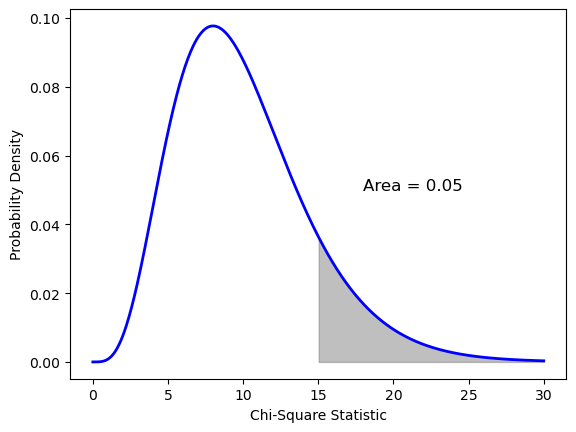

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = 10 # degrees of freedom
x = np.linspace(0, 30, 500) # range of x values
y = stats.chi2.pdf(x, df) # probability density function

plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density')
plt.fill_between(x[x>=15], y[x>=15], color='grey', alpha=0.5)
plt.text(18, 0.05, 'Area = 0.05', fontsize=12)
plt.show()


### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [13]:
import math

# Sample size
n = 1000

# Number of people who prefer Coke
x = 520

# Sample proportion
p_hat = x / n

# Calculate standard error
se = math.sqrt((p_hat * (1 - p_hat)) / n)

# Calculate the z-score for 99% confidence level
z = 2.576

# Calculate margin of error
me = z * se

# Calculate lower and upper bounds of the confidence interval
lower = p_hat - me
upper = p_hat + me

# Print the results
print(f"99% Confidence interval: ({lower:.4f}, {upper:.4f})")


99% Confidence interval: (0.4793, 0.5607)


### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [18]:
from scipy.stats import chisquare

observed = [45, 55]
expected = [50, 50]

test_stat, p_value = chisquare(observed, expected)

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis. The coin is biased towards tails.")
else:
    print("Fail to reject null hypothesis. The coin is fair.")
    
print("Test statistic:", test_stat)
print("p-value:", p_value)


Fail to reject null hypothesis. The coin is fair.
Test statistic: 1.0
p-value: 0.31731050786291115


### Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.

| |Lung Cancer: Yes|Lung Cancer: No|
|:---|:-----------------:|:----------:|
|Smoker| 60| 140|
|Non-smoker |30| 170|


In [19]:
from scipy.stats import chi2_contingency

# Create the contingency table
obs = [[60, 140], [30, 170]]

# Conduct the chi-square test for independence
chi2, p, dof, expected = chi2_contingency(obs)

# Output the results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 12.0573
P-value: 0.0005
Degrees of freedom: 1
Expected frequencies:
[[ 45. 155.]
 [ 45. 155.]]


### Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.


||Milk Chocolate|Dark Chocolate|White Chocolate|
|:--------------:|:------------:|:-----------:|:------------:|
|U.S. (n=500) |200 |150 |150|
|U.K. (n=500)| 225 |175 |100|

   - Use a significance level of 0.01.

In [20]:
import numpy as np
from scipy.stats import chi2_contingency


contingency_table = np.array([[200, 150, 150], [225, 175, 100]])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check p-value
alpha = 0.01

if p < alpha:
    print("There is a significant association between chocolate preference and country of origin.")
else:
    print("There is no significant association between chocolate preference and country of origin.")



There is a significant association between chocolate preference and country of origin.


### Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

To conduct the hypothesis test, we can use a one-sample t-test. The null hypothesis is that the population mean is equal to 70, and the alternative hypothesis is that the population mean is significantly different from 70.

We can calculate the t-statistic and the corresponding p-value using the following formula:

t = (sample_mean - hypothesized_mean) / (sample_standard_error)

where sample_standard_error = sample_standard_deviation / sqrt(sample_size)

Let's first calculate the t-statistic and the p-value using Python:

In [21]:
import scipy.stats as stats

sample_mean = 72
hypothesized_mean = 70
sample_standard_deviation = 10
sample_size = 30

sample_standard_error = sample_standard_deviation / (sample_size ** 0.5)

t_statistic = (sample_mean - hypothesized_mean) / sample_standard_error

p_value = stats.t.sf(abs(t_statistic), sample_size - 1) * 2

print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 1.0954451150103321
p-value: 0.28233623728606977


In [25]:
print(f"The t-statistic is {t_statistic: .2f} and the p-value is {p_value: .2f}. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. There is not enough evidence to conclude that the population mean is significantly different from 70 at the 5% level of significance.")

'''Therefore, we can conclude that there is not enough evidence to support the claim that the population mean is significantly different from 70.'''

The t-statistic is  1.10 and the p-value is  0.28. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. There is not enough evidence to conclude that the population mean is significantly different from 70 at the 5% level of significance.


'Therefore, we can conclude that there is not enough evidence to support the claim that the population mean is significantly different from 70.'